<a href="https://colab.research.google.com/github/hmezer/codex-metricus/blob/main/time-series-analysis/spectral_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Periodogram Demo: Visualizing Frequency Content in a Time Series

This script demonstrates how to use spectral analysis to uncover hidden periodic patterns in a time series using the **periodogram**.

## 🧠 What is a Periodogram?

A **periodogram** estimates how the **variance (or power)** of a time series is distributed across different **frequencies**. It helps identify **dominant cycles** (like seasonality, oscillations, etc.) that might not be obvious just by looking at the raw data.

## 📐 What Does This Script Do?

- Simulates a time series of the form:
  \[
  x_t = \sin(2\pi f_1 t) + 0.5 \cdot \cos(2\pi f_2 t) + \text{noise}
  \]
  with:
  - \( f_1 = 0.1 \) (main sine wave),
  - \( f_2 = 0.3 \) (weaker cosine component),
  - and added Gaussian noise.

- Plots the **raw time series**.

- Computes and plots the **periodogram** using `scipy.signal.periodogram`.

## 📈 What to Expect?

- The **time series plot** looks noisy and not obviously periodic.
- The **periodogram** shows clear **peaks at frequencies 0.1 and 0.3**, revealing the underlying structure.
- Noise appears as low, scattered power across all frequencies.

## 🛠️ Requirements

- Python 3
- NumPy
- Matplotlib
- SciPy

Install dependencies via:

```bash
pip install numpy matplotlib scipy


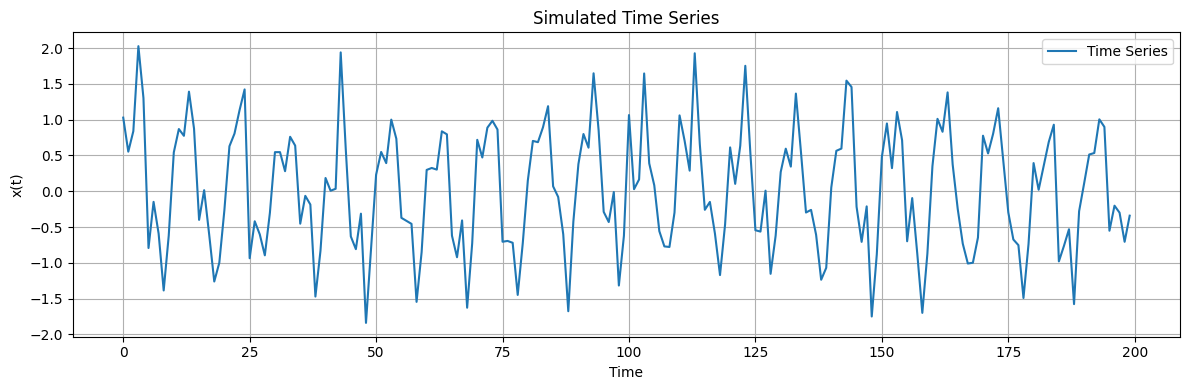

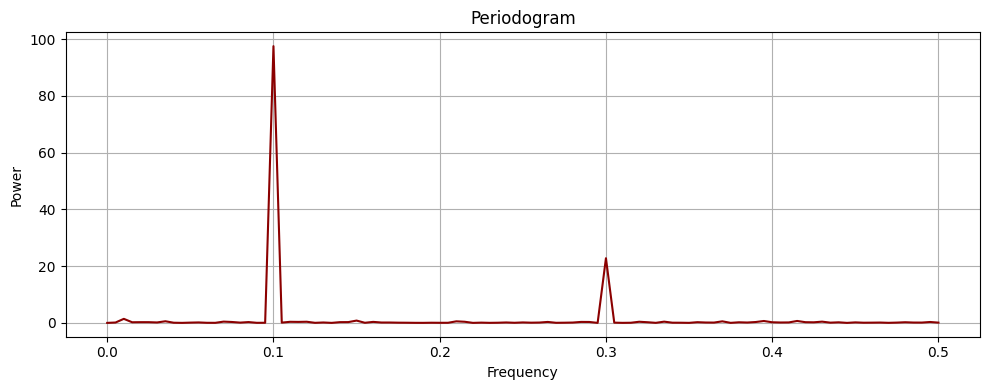

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# 1. Create time vector
n = 200
t = np.arange(n)

# 2. Define frequencies
f1 = 0.1  # dominant sine wave
f2 = 0.3  # weaker cosine component

# 3. Simulate time series
np.random.seed(0)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.cos(2 * np.pi * f2 * t)
noise = np.random.normal(0, 0.3, size=n)
x = signal + noise

# 4. Plot time series
plt.figure(figsize=(12, 4))
plt.plot(t, x, label='Time Series')
plt.title('Simulated Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Compute and plot periodogram
freqs, power = periodogram(x)

plt.figure(figsize=(10, 4))
plt.plot(freqs, power, color='darkred')
plt.title('Periodogram')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid(True)
plt.tight_layout()
plt.show()


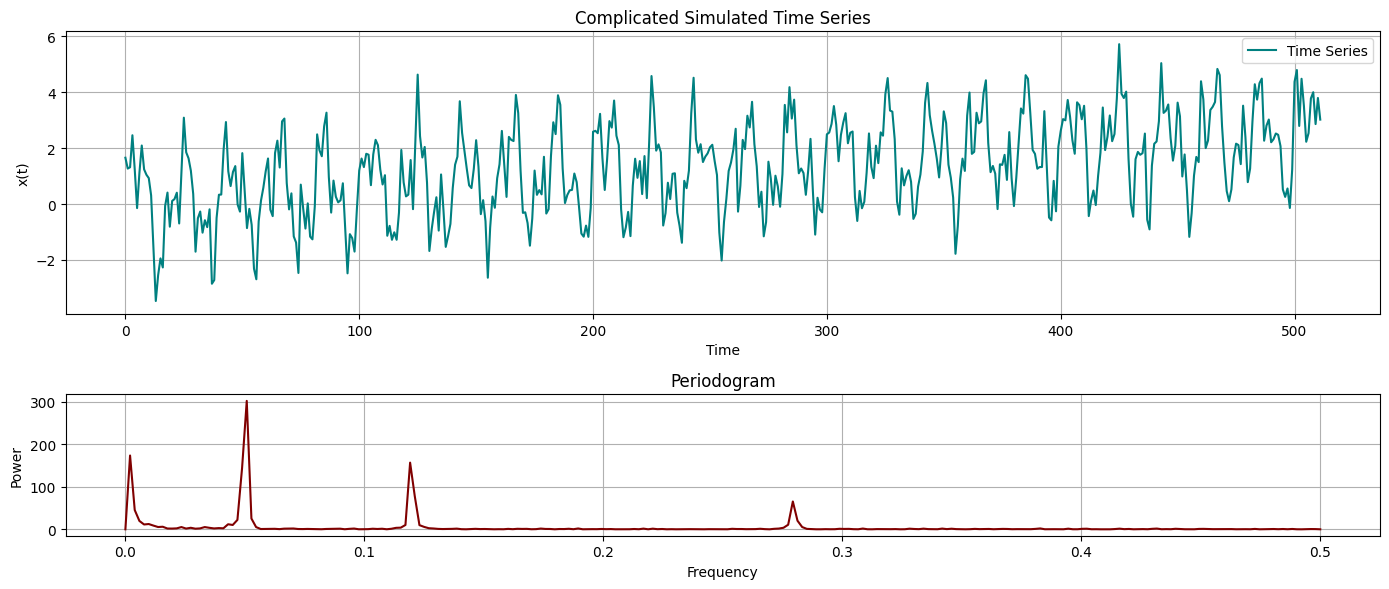

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Set seed for reproducibility
np.random.seed(42)

# Time vector
n = 512
t = np.arange(n)

# Create a more complex time series:
# Combination of three sinusoids + a trend + autoregressive noise
x = (1.5 * np.sin(2 * np.pi * 0.05 * t) +
     1.0 * np.sin(2 * np.pi * 0.12 * t + np.pi / 4) +
     0.7 * np.sin(2 * np.pi * 0.28 * t + np.pi / 2) +
     0.005 * t +  # linear trend
     np.random.normal(0, 0.5, n))  # white noise

# Plot the time series
fig, ax = plt.subplots(2, 1, figsize=(14, 6), gridspec_kw={'height_ratios': [2, 1]})
ax[0].plot(t, x, label="Time Series", color='teal')
ax[0].set_title("Complicated Simulated Time Series")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("x(t)")
ax[0].legend()
ax[0].grid(True)

# Periodogram
f, Pxx = periodogram(x)
ax[1].plot(f, Pxx, color='maroon')
ax[1].set_title("Periodogram")
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel("Power")
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def spectral_analysis(stock_prices, sampling_interval=1):
    """
    Perform spectral analysis on stock price data.

    Parameters:
    - stock_prices: pd.Series or 1D numpy array of stock prices indexed by time.
    - sampling_interval: Time between observations (default 1, e.g. daily = 1 day).

    Returns:
    - frequencies: Frequencies corresponding to the spectrum.
    - power_spectrum: Magnitude squared of FFT components.
    """

    # Remove trend to focus on oscillations (detrend by differencing or subtracting mean)
    detrended = stock_prices - np.mean(stock_prices)

    # Compute FFT
    fft_vals = np.fft.fft(detrended)
    n = len(fft_vals)

    # Frequency bins
    freqs = np.fft.fftfreq(n, d=sampling_interval)

    # Power spectrum (magnitude squared)
    power = np.abs(fft_vals)**2

    # Keep only the positive frequencies (since FFT is symmetric)
    mask = freqs > 0
    freqs = freqs[mask]
    power = power[mask]

    return freqs, power

In [4]:
# prompt: get some stock data using yfinance and save to a pd df

!pip install yfinance

import yfinance as yf
import pandas as pd

# Define the ticker symbol (e.g., Apple)
ticker_symbol = "AAPL"

# Get data for the ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get historical market data
# You can specify start and end dates, and interval (e.g., "1d", "1wk", "1mo")
stock_df = ticker_data.history(period="1mo") # Get data for the last month

# Display the first few rows of the DataFrame
stock_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-16 00:00:00-04:00,197.300003,198.690002,196.559998,198.419998,43020700,0.0,0.0
2025-06-17 00:00:00-04:00,197.199997,198.389999,195.210007,195.639999,38856200,0.0,0.0
2025-06-18 00:00:00-04:00,195.940002,197.570007,195.070007,196.580002,45394700,0.0,0.0
2025-06-20 00:00:00-04:00,198.240005,201.699997,196.860001,201.000000,96813500,0.0,0.0
2025-06-23 00:00:00-04:00,201.630005,202.300003,198.960007,201.500000,55814300,0.0,0.0


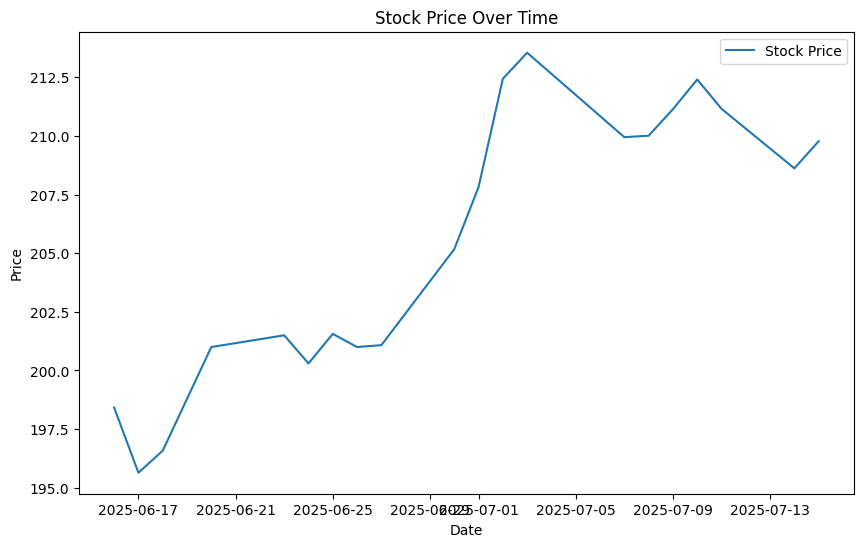

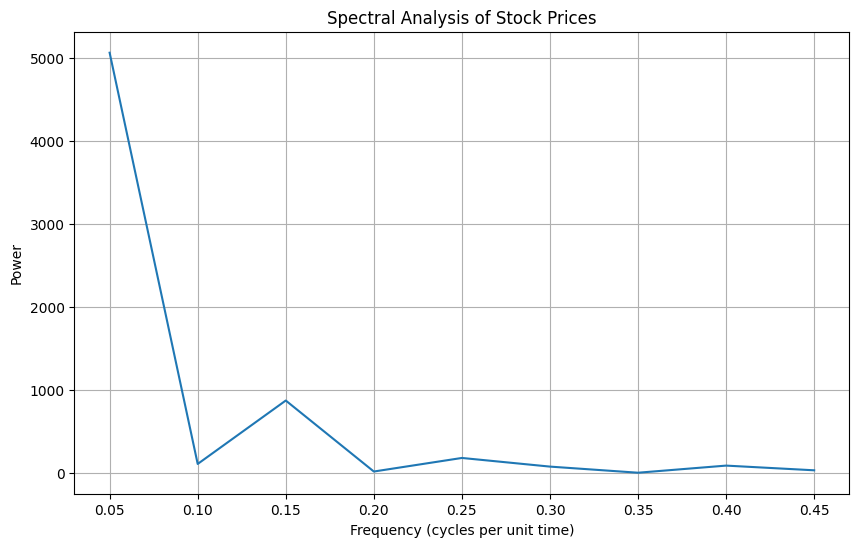

In [6]:
# Example: Load stock price data (CSV with Date, Close columns)
prices = stock_df['Close']

# Run spectral analysis
freqs, power = spectral_analysis(prices)

# Plot the stock price
plt.figure(figsize=(10,6))
plt.plot(prices.index, prices, label='Stock Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot power spectrum
plt.figure(figsize=(10,6))
plt.plot(freqs, power)
plt.title('Spectral Analysis of Stock Prices')
plt.xlabel('Frequency (cycles per unit time)')
plt.ylabel('Power')
plt.grid(True)
plt.show()


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def spectral_analysis(stock_prices, sampling_interval=1):
    detrended = stock_prices - np.mean(stock_prices)
    fft_vals = np.fft.fft(detrended)
    n = len(fft_vals)
    freqs = np.fft.fftfreq(n, d=sampling_interval)
    power = np.abs(fft_vals)**2
    return freqs, power, n

def generate_synthetic_series(freqs, power, n):
    # Get amplitudes from power
    amplitudes = np.sqrt(power)

    # Initialize complex spectrum array (same length n)
    synthetic_fft = np.zeros(n, dtype=complex)

    # Positive frequencies mask (freqs > 0 for mirroring, freqs >= 0 for amplitude assignment)
    pos_mask_amplitudes = freqs >= 0
    pos_mask_mirror = freqs > 0

    pos_freqs = freqs[pos_mask_amplitudes]
    pos_amps = amplitudes[pos_mask_amplitudes]

    # Generate random phases for positive freqs except zero freq
    # Exclude the zero frequency from random phase generation
    random_phases = np.exp(1j * 2 * np.pi * np.random.rand(len(pos_amps) - 1))

    # Assign amplitudes and random phases to positive frequencies, excluding zero freq
    synthetic_fft[pos_mask_mirror] = pos_amps[1:] * random_phases

    # Handle the zero frequency component separately (real and amplitude is power[0])
    synthetic_fft[0] = power[0]**0.5 # Amplitude of zero frequency

    # Mirror to negative frequencies for Hermitian symmetry (real time series)
    # Need to mirror based on the frequencies used for random phases, excluding zero freq
    synthetic_fft[~pos_mask_amplitudes] = np.conj(synthetic_fft[pos_mask_mirror][::-1])


    # Inverse FFT to time domain
    synthetic_series = np.fft.ifft(synthetic_fft).real

    # Add back mean (since original was detrended)
    # We don't add back the mean here. The FFT of the detrended series should have zero mean.
    # Adding the mean back will be done after the iFFT.
    mean_original = prices.mean()
    synthetic_series += mean_original


    return synthetic_series

if __name__ == "__main__":
    # Example: Load stock price data

    freqs, power, n = spectral_analysis(prices)

    synthetic = generate_synthetic_series(freqs, power, n)

    # Plot original vs synthetic
    plt.figure(figsize=(12,6))
    plt.plot(prices.values, label='Original Stock Prices')
    plt.plot(synthetic, label='Synthetic Series (Spectral Match)', alpha=0.75)
    plt.legend()
    plt.title('Original vs Synthetic Time Series')
    plt.show()

ValueError: NumPy boolean array indexing assignment cannot assign 9 input values to the 10 output values where the mask is true